In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Titanic/tested.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
titanic.shape

(418, 12)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

the survival rate of each class

<Axes: xlabel='Pclass', ylabel='Survived'>

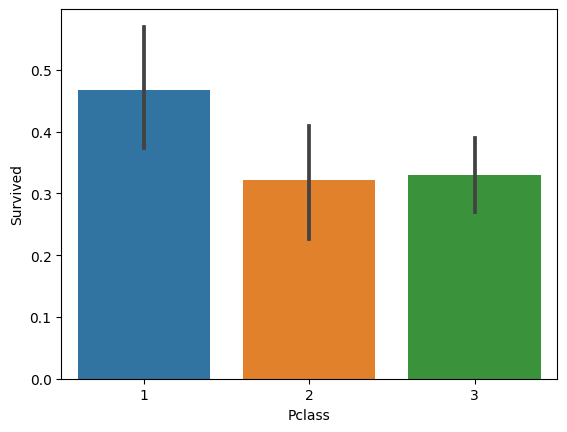

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

<Axes: ylabel='Survived'>

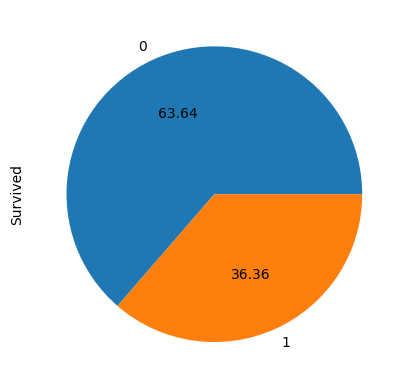

In [ ]:
titanic['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: >

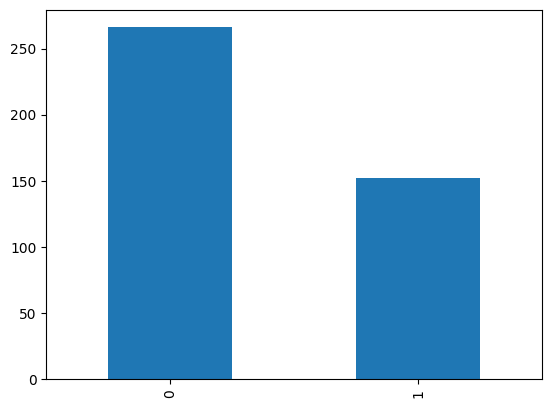

In [ ]:
titanic['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

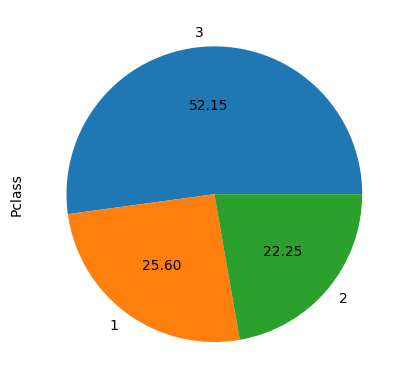

In [ ]:
titanic['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: >

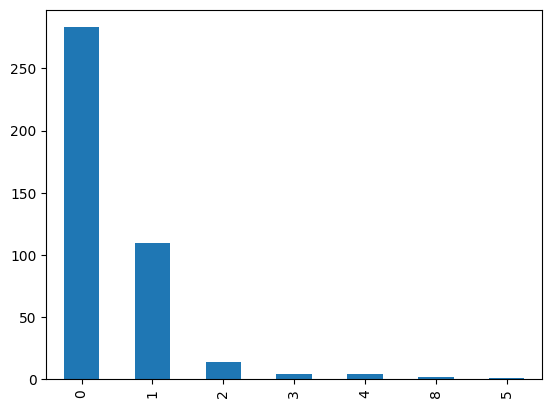

In [ ]:
titanic['SibSp'].value_counts().plot(kind='bar')

<Axes: >

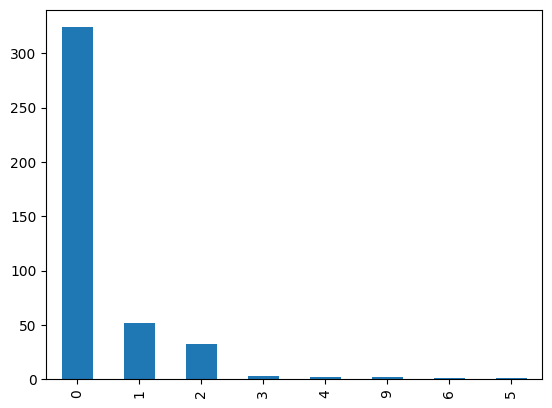

In [ ]:
titanic['Parch'].value_counts().plot(kind='bar')

In [ ]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [ ]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,1,1,1
male,0,0,0


In [ ]:
Age = pd.cut(titanic['Age'], [0, 18, 80])
titanic.pivot_table('Survived', ['Sex', Age], 'Pclass')

Pclass           1  2  3
Sex    Age              
female (0, 18]   1  1  1
       (18, 80]  1  1  1
male   (0, 18]   0  0  0
       (18, 80]  0  0  0

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
for val in titanic:
   print(titanic[val].value_counts())
   print()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

0    266
1    152
Name: Survived, dtype: int64

3    218
1    107
2     93
Name: Pclass, dtype: int64

Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64

male      266
female    152
Name: Sex, dtype: int64

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

0    324
1     52
2     33
3      3
4 

In [ ]:
titanic = titanic.drop(['Cabin'], axis=1)
titanic = titanic.dropna(subset =['Fare', 'Age'])

In [ ]:
titanic.shape

(331, 11)

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
print(titanic['Name'].unique())
print(titanic['Sex'].unique())
print(titanic['Ticket'].unique())
print(titanic['Embarked'].unique())

['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram'
 'Louch, Mr. Charles Alexander' 'Jefferys, Mr. Clifford Thomas'
 'Dean, Mrs. Bertram (Eva Georgetta Light)' 'Mock, Mr. Philipp

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic.iloc[:,4]= labelencoder.fit_transform(titanic.iloc[:,4].values)
titanic.iloc[:,3]= labelencoder.fit_transform(titanic.iloc[:,3].values)
titanic.iloc[:,8]= labelencoder.fit_transform(titanic.iloc[:,8].values)
titanic.iloc[:,10]= labelencoder.fit_transform(titanic.iloc[:,10].values)

print(titanic['Sex'].unique())
print(titanic['Name'].unique())
print(titanic['Ticket'].unique())
print(titanic['Embarked'].unique())

[1 0]
[182 318 220 322 159 289  80  56   4  97 172 277 164  66 329 180  21 166
  20 261 230 320 265 256 233  91  43 201 168 102 217 179  54 270 178 142
  84 184 243  69  52  87 274 251 160 131 254  82   2  68 107 210  35  42
 263  53 218 296 132 219 216 224 234 136 181  85   6 113  39 286  64  27
  25 308 121  95  34 292  65 205  44 222 284 307 170 293 163  51 290 282
 125  50 287  71 269  28  67 306 271  63  88  46  41 245 281 145 108  60
 325 272 114 144 143  94 264  29 195 297  96 192 122 189  17 118  33 202
  37 242 294 324 244 187  45 130 153 326 120  18  47 273 283  31  78 211
  77 207 111 208 246  98 299  13 330 199 115 176 278 226  26  93  23 252
  11 212  76 259 103   8 100 165   9 152 314 316 119 253  81 175  58  19
 126 161 291 319 317  90 300 305  24 157 112 197  70 279 183 177 116 162
 311   3  72 268 310 225  32 214 328 227 309 188 250 248 209  73  49 238
 127 302 235 232 240 295 258 105 276  92 109 323  12 193 200 171 231 247
 249  89   7   5 151 148  55 298  61 313 147 

<ipython-input-22-37fd5f069700>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  titanic.iloc[:,4]= labelencoder.fit_transform(titanic.iloc[:,4].values)
<ipython-input-22-37fd5f069700>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  titanic.iloc[:,3]= labelencoder.fit_transform(titanic.iloc[:,3].values)
<ipython-input-22-37fd5f069700>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = 

In [ ]:
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def models(X_train,Y_train):

  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 42)
  log.fit(X_train, Y_train)

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 42)
  svc_lin.fit(X_train, Y_train)

  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 42)
  svc_rbf.fit(X_train, Y_train)

  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
  tree.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
  forest.fit(X_train, Y_train)

  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.4583333333333333
[1]K Nearest Neighbor Training Accuracy: 0.19318181818181818
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 1.0
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 1.0
[4]Gaussian Naive Bayes Training Accuracy: 1.0
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9772727272727273


In [ ]:
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Name,0.313
Age,0.286
Pclass,0.141
SibSp,0.087
Survived,0.058
Sex,0.058
Parch,0.057


<Axes: xlabel='feature'>

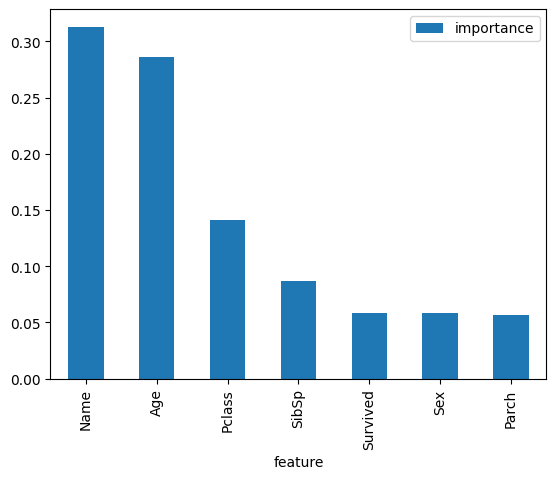

In [ ]:
importances.plot.bar()

In [ ]:
pred = model[6].predict(X_test)
print(pred)

print()

print(Y_test)

[1101  913 1053 1049 1215 1035 1032  989 1104 1169 1164 1007  948  920
 1221  920 1109 1164 1238 1095 1243 1031  996 1169 1127  971  905  944
  896 1042 1285 1107 1004 1210  996 1127  934 1187 1084 1280  937 1179
 1061 1217  951  900  935  961  998 1199  996  898 1022  998 1063 1233
 1238  900  953 1151 1110 1221 1110 1063  937 1185 1151]

[ 919 1281  981 1172  960 1099 1246 1149 1230 1137  984  901 1291 1050
 1232 1058 1034 1076  986 1142 1029 1066 1301 1139  897 1030 1245 1218
 1207 1294 1265 1270  966  995 1176 1124 1120 1212  947 1039  930  942
 1138 1118 1033  979 1114  945 1018 1284 1009 1183 1146  909 1028 1192
  899  958 1077 1115 1266 1262 1289  895  987 1200  963]


In [ ]:
my_survival = [[1,1,1,1,1,1,1]]
pred = model[6].predict(my_survival)
print(pred)

if pred[0] == 0:
  print('You survived')
else:
  print('You could not make it')

[917]
You could not make it
